In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [35]:
train_data = np.array(pandas.read_csv('project3data/data.txt', sep='\t', header=None, names = ['user','movie','rating']))
movie_labels = pandas.read_csv('project3data/movies.txt', sep='\t', header=None, index_col=0, names = ['Movie Title', 'Unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])

In [36]:
num_users = max(train_data[:,0])
num_movies = max(train_data[:,1])

In [37]:
#Step 1a
def get_loss(U, V, dataset):
    error = 0.0
    for datum in dataset:
        i = datum[0] - 1
        j = datum[1] - 1
        if i >= num_users or j >= num_movies:
            continue
        y = datum[2]
        error += 0.5 * (y - np.dot(U[:,i], V[:,j])) ** 2
    return error/len(dataset)

def train_step(eta, lam, data, U, V):
    for datum in data:
        i = datum[0] - 1
        j = datum[1] - 1
        y = datum[2]

        U[:,i] = np.subtract(U[:,i], eta * (np.subtract(lam * U[:,i], V[:,j] * (y - np.dot(U[:,i], V[:,j])))))
        V[:,j] = np.subtract(V[:,j], eta * (np.subtract(lam * V[:,j], U[:,i] * (y - np.dot(U[:,i], V[:,j])))))
    return U, V
    
def train(k, lam):
    eta = 0.03
    U = np.random.rand(k , num_users) - 0.5
    V = np.random.rand(k , num_movies) - 0.5
    
    first_loss = get_loss(U, V, train_data)
    
    print('First Loss: ' + str(first_loss))
    
    U, V = train_step(eta, lam, train_data, U, V)
    
    second_loss = get_loss(U, V, train_data)
    first_loss_red = first_loss - second_loss
    
    print('Second Loss: ' + str(second_loss))
    print('First Loss Reduction: ' + str(first_loss_red))
    
    epsilon = 0.0001
    
    curr_loss = second_loss
    curr_loss_red = first_loss_red
    it = 1
    while curr_loss_red / first_loss_red > epsilon:
        np.random.shuffle(train_data)
        U, V = train_step(eta, lam, train_data, U, V)
        
        prev_loss = curr_loss
        curr_loss = get_loss(U, V, train_data)
        curr_loss_red = prev_loss - curr_loss
        
        print('Iteration: ' + str(it))
        print('Loss: ' + str(curr_loss))
        print('Loss Reduction: ' + str(curr_loss_red))
        print('Loss Reduction Ratio: ' + str(curr_loss_red / first_loss_red))
        it += 1 
        
    return U, V


In [38]:
#Step 1a Continued
train_U, train_V = train(20, 0.1)

First Loss: 6.93552115344
Second Loss: 0.494654026611
First Loss Reduction: 6.44086712683
Iteration: 1
Loss: 0.432627619684
Loss Reduction: 0.0620264069271
Loss Reduction Ratio: 0.00963013297832
Iteration: 2
Loss: 0.403455665548
Loss Reduction: 0.0291719541361
Loss Reduction Ratio: 0.00452919670002
Iteration: 3
Loss: 0.390170624633
Loss Reduction: 0.0132850409144
Loss Reduction Ratio: 0.00206261682671
Iteration: 4
Loss: 0.377745669003
Loss Reduction: 0.0124249556306
Loss Reduction Ratio: 0.0019290811914
Iteration: 5
Loss: 0.365335134386
Loss Reduction: 0.0124105346172
Loss Reduction Ratio: 0.00192684220506
Iteration: 6
Loss: 0.359831740231
Loss Reduction: 0.00550339415469
Loss Reduction Ratio: 0.000854449260685
Iteration: 7
Loss: 0.353765883902
Loss Reduction: 0.0060658563286
Loss Reduction Ratio: 0.000941776349233
Iteration: 8
Loss: 0.343683779769
Loss Reduction: 0.0100821041336
Loss Reduction Ratio: 0.00156533335264
Iteration: 9
Loss: 0.33780641052
Loss Reduction: 0.00587736924894
Lo

In [39]:
#Step 2a
def mean_center(V, U):
    new_V = np.empty(V.shape)
    new_U = np.empty(U.shape)
    num_features = len(V)
    for i in range(num_features):
        curr_movie_feature_row = V[i,:]
        curr_user_feature_row = U[i,:]
        mean = np.mean(curr_movie_feature_row)
        new_V[i,:] = curr_movie_feature_row - mean
        new_U[i,:] = curr_user_feature_row - mean
    return new_V, new_U

In [41]:
#Step 2a Continued
mean_centered_V, mean_centered_U = mean_center(train_V, train_U)

In [42]:
#Step 2a Continued
A, Sigma, B_trans = np.linalg.svd(mean_centered_V)

In [43]:
#Step 2b
best_two_svd = A[:,0:2]

In [48]:
#Step 2b Continued
V_projection = np.dot(best_two_svd.T, mean_centered_V)
U_projection = np.dot(best_two_svd.T, mean_centered_U)

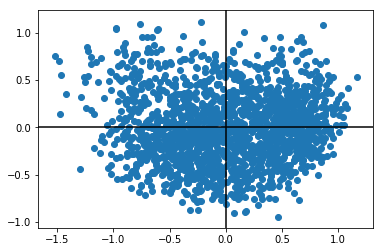

In [68]:
#Step 2c
fig, ax = plt.subplots()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.scatter(V_projection[0], V_projection[1])
plt.show()

array([[ 0.16688787, -0.18644599, -0.24436308, ..., -0.6883804 ,
        -0.57968635,  0.04304258],
       [-0.57205709, -0.46047436,  0.10177461, ...,  0.8401035 ,
        -0.18533563,  0.28809195]])